# Melhorar na lib

- multiconinearity demorando mto e usado 2x no codigo
- retornar lista da feat. permutation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#Sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from sklearn.metrics import precision_score
import sys
import warnings

%load_ext autoreload
%autoreload 2
%matplotlib inline
sys.path.insert(1, '../src/')

import utils
from guara.feature_selection.feature_selection import FeatureSelection


pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")
warnings.filterwarnings("ignore")



In [2]:
df = utils.import_s3_example_dataset('marketing').drop('ID', axis = 1)
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Response',
       'idade', 'dias_cliente', 'education_n', 'parceiro', 'pessoas_casa',
       'renda_per_capta', 'compra_total_ano', 'porcentagem_compras_gold',
       'gasto_renda', 'total_purchases', 'disc_purchases', 'num_compras_ano',
       'percent_disc_compra', 'ticket_medio', 'conversao_site',
       'cupons_aceitados'],
      dtype='object')

In [3]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,idade,dias_cliente,education_n,parceiro,pessoas_casa,renda_per_capta,compra_total_ano,porcentagem_compras_gold,gasto_renda,total_purchases,disc_purchases,num_compras_ano,percent_disc_compra,ticket_medio,conversao_site,cupons_aceitados
0,Graduation,Single,10.970592,0,0,58,6.455199,4.488636,6.304449,5.153292,4.488636,4.488636,1.386294,8,2.397895,4,7,0,1,63,2675,2,0,1,10.970592,764.5,0.055959,0.013064,22,1.386294,3.001869,0.136364,5.543906,0.012736,0
1,Graduation,Single,10.743869,1,1,38,2.484907,0.693147,1.945910,1.098612,0.693147,1.945910,1.098612,1,0.693147,2,5,0,0,66,2125,2,0,3,9.645300,10.5,0.251314,0.000227,4,1.098612,0.687059,0.500000,2.790093,0.002820,0
2,Graduation,Together,11.179046,0,0,26,6.056784,3.912023,4.852030,4.718499,3.091042,3.761200,0.693147,8,1.098612,10,4,0,0,55,2324,2,1,2,10.485913,367.0,0.055643,0.005112,20,0.693147,3.141136,0.050000,4.769300,0.025490,0
3,Graduation,Together,10.190432,1,0,26,2.484907,1.609438,3.044522,2.397895,1.386294,1.791759,1.098612,2,0.000000,4,6,0,0,36,2151,2,1,3,9.091895,24.0,0.099091,0.000900,6,1.098612,1.018131,0.333333,3.201632,0.004638,0
4,PhD,Married,10.973254,1,0,94,5.159055,3.784190,4.779123,3.850148,3.332205,2.772589,1.791759,5,1.386294,6,5,0,0,39,2173,4,1,3,9.874676,203.5,0.036192,0.003485,14,1.791759,2.351588,0.357143,4.472065,0.013711,0


# Feature Selection

In [6]:
continous_features = ['Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth','idade', 'dias_cliente', 'education_n',
        'pessoas_casa', 'renda_per_capta', 'compra_total_ano',
       'porcentagem_compras_gold', 'gasto_renda', 'total_purchases',
       'disc_purchases', 'num_compras_ano', 'percent_disc_compra',
       'ticket_medio', 'conversao_site', 'cupons_aceitados']

category_features = ['Education','Marital_Status',
       'Complain','parceiro', 'Response']

target = 'Response'

In [7]:
fs = FeatureSelection()
all_selected_features, continuos_features_selected, category_best_features = fs.select_best_features(
    
    X=df,
    y=df[target], 
    objective='classification', 
    continous_features=continous_features, 
    category_features=category_features

)

There are no constant features
Starting process to remove duplicate features
Completed process for removing duplicate assets
Duplicate features removed are: ['disc_purchases']


KeyError: "['disc_purchases'] not in index"

In [7]:
all_selected_features

['Response', 'Complain', 'Education', 'parceiro']

In [8]:
continuos_features_selected

[]

In [9]:
category_best_features

['Response', 'Complain', 'Education', 'parceiro']

# Modelagem 

In [10]:
def temporal_split(data, y, train_split = 0.7, test_split = 0.15):
    
    train_size = int(len(data)*train_split)
    val_size = int(len(data)*(1 - train_split-test_split))
    test_size = int(len(data)*test_split)
    
    print(train_size)
    print(val_size)
    print(test_size)
    
    x_train = data[:train_size]
    y_train = y[:train_size]

    x_val   = data[train_size:train_size+val_size]
    y_val   = y[train_size:train_size+val_size]

    x_test  = data[train_size+val_size:]
    y_test  = y[train_size+val_size:]

    print('x_train shape:',x_train.shape)
    print('y_train shape:',y_train.shape)
    print('x_val   shape:',x_val.shape)
    print('y_val   shape:',y_val.shape)
    print('x_test  shape:',x_test.shape)
    print('y_test  shape:',y_test.shape)

    return x_train,y_train,x_val,y_val,x_test,y_test

def frange(start, stop, step):
    i = start
    while i < stop:
        yield i
        i += step

def custo(y_test, y_pred_):
    df_ = pd.DataFrame(list(zip(y_test, y_pred_)), columns = ['test', 'pred'])
    df_ = df_[df_.pred == 1].groupby('test').count().reset_index()
    TP = df_[df_['test'] == 1]['pred'].values
    if not TP: TP = 0
    else: TP = TP[0]
    FP = df_[df_['test'] == 0]['pred'].values
    if not FP: FP = 0 
    else: FP = FP[0]
    return TP*8 - 3*FP 


        
def f1_treshold(y_test, y_pred):
    valores_f1 = []
    #valores_cm = []
    passo = [x for x in frange(0.1, 1, 0.05)]

    for i in passo:
        y_pred_ = np.where(y_pred < i , 0, 1)
        valores_f1.append(custo(y_test, y_pred_))
        
    sns.set_style("darkgrid")    
    plt.figure(figsize=(15,5)) 
    plt.title('Sensibilidade do treshold no F1 Score', fontsize = 20)
    plt.ylabel('F1 Score', fontsize = 20)
    plt.xlabel('Treshold', fontsize = 20)
    plt.tick_params(labelsize=15)

    plt.plot(passo, valores_f1)
    plt.axvline(x=passo[valores_f1.index(max(valores_f1))],  color = 'green', ls = '--' )
    #plt.ylim((0,1))
    #plt.xlim((0,1))

    plt.legend(['F1 Score', 'Melhor treshold'], loc='upper right', fontsize= 20)

    plt.show()

    print('valor máximo de F1: %.3f%%' % (max(valores_f1)))
    
    return passo[valores_f1.index(max(valores_f1))]

from sklearn.metrics import confusion_matrix
def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(6,6)):
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    The plot image is saved to disk.
    args: 
      y_true:    true label of the data, with shape (nsamples,)
      y_pred:    prediction of the data, with shape (nsamples,)
      filename:  filename of figure file to save
      labels:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
      ymap:      dict: any -> string, length == nclass.
                 if not None, map the labels & ys to more understandable strings.
                 Caution: original y_true, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
        

    cm = confusion_matrix( y_true, y_pred, labels=labels)
    
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax, cmap = 'Blues', vmin =0, annot_kws={"size": 15},square=True )
    plt.title('F1 score {:2f} \n'.format(f1_score(y_true, y_pred)), size = 20)
    #plt.savefig(filename)
    plt.show()

def x_y_plot(y_train, y_pred_train, y_test, y_pred_test, frac = 1):
   
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(15,7))
    
    train = pd.DataFrame({'train':y_train, 'predicted': y_pred_train})
    train = train.sample(frac = frac)
    
    test = pd.DataFrame({'train':y_test, 'predicted': y_pred_test})
    test = test.sample(frac = frac)
    
    
    
    ##########################################################################################################
    
    plt.subplot(1, 2, 1)
    sns.scatterplot(x = train['predicted'], 
                    y = train['train'], 
                    alpha = 0.1)
    
    sns.lineplot(x=np.linspace(min([min(train['predicted']), min(train['train'])]),
                               max([max(train['predicted']), max(train['train'])])),
                 y=np.linspace(min([min(train['predicted']), min(train['train'])]),
                               max([max(train['predicted']), max(train['train'])])),
                 label="x=y", 
                 color ='red' )
    
    #plt.xlabel('correlation: {:.2f}'.format(train.corr().iloc[0,1], fontsize= 20)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Treino \n R² = {:.4f}'.format(r2_score(train['train'], train['predicted'])), size = 15)
    
    ###########################################################################################################
    
    plt.subplot(1, 2, 2)
    sns.scatterplot(x = test['predicted'], 
                    y = test['train'], 
                    alpha = 0.1)
    
    sns.lineplot(x=np.linspace(min([min(test['predicted']), min(test['train'])]),
                               max([max(test['predicted']), max(test['train'])])),
                 y=np.linspace(min([min(test['predicted']), min(test['train'])]),
                               max([max(test['predicted']), max(test['train'])])),
                 label="x=y", 
                 color ='red' )
    
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Teste \n R² = {:.4f}'.format(r2_score(test['train'], test['predicted'])), )

In [11]:
###########################################################
################## NOME DO EXPERIMENTO ####################

exp = 'lgbm_rmse'

###########################################################
###########################################################
from datetime import datetime
import os

now = datetime.now().strftime('%m_%d_%H%M%S')

path_dir = 'experiments/' + '_'.join([now, exp, str(len(df))])

os.mkdir(path_dir)
print('experimento sera salvo em : ', path_dir)


experimento sera salvo em :  experiments/05_14_190326_lgbm_rmse_2216


In [12]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Response',
       'idade', 'dias_cliente', 'education_n', 'parceiro', 'pessoas_casa',
       'renda_per_capta', 'compra_total_ano', 'porcentagem_compras_gold',
       'gasto_renda', 'total_purchases', 'disc_purchases', 'num_compras_ano',
       'percent_disc_compra', 'ticket_medio', 'conversao_site',
       'cupons_aceitados'],
      dtype='object')

In [13]:
#num_features = ['Recency', 'dias_cliente', 'NumCatalogPurchases', 'renda_per_capta','compra_total_ano', 'cupons_aceitados']
category_features = ['Marital_Status', 'Complain', 'parceiro']

['Education', 'Marital_Status', 'Complain', 'parceiro', 'Response']

In [ ]:
df.

In [14]:
from sklearn.utils import shuffle
from sklearn import preprocessing

df = pd.read_feather("../data/processed/feature_engineered.feather")


#selection = category_best_features + num_features + ['Response']
selection = df.columns
#selection = new_cols +  ['Response']


df = df[selection]
print(selection)


le = preprocessing.LabelEncoder()
transform = ['Education', 'Marital_Status']
for i in transform:
    if i in selection:
        df[i] = le.fit_transform(df[i])


df = shuffle(df, random_state = 666)


x_train, y_train, x_val, y_val, x_test, y_test = temporal_split(
    
                                                    data = df.drop(target, axis = 1) ,
                                                    y = df[target],
                                                    train_split = 0.7, 
                                                    test_split = 0.15
)

print('')
print(y_train.sum()/len(y_train))
print(y_val.sum()/len(y_val))
print(y_test.sum()/len(y_test))

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Response',
       'idade', 'dias_cliente', 'education_n', 'parceiro', 'pessoas_casa',
       'renda_per_capta', 'compra_total_ano', 'porcentagem_compras_gold',
       'gasto_renda', 'total_purchases', 'disc_purchases', 'num_compras_ano',
       'percent_disc_compra', 'ticket_medio', 'conversao_site',
       'cupons_aceitados'],
      dtype='object')
1551
332
332
x_train shape: (1551, 35)
y_train shape: (1551,)
x_val   shape: (332, 35)
y_val   shape: (332,)
x_test  shape: (333, 35)
y_test  shape: (333,)

0.1521598968407479
0.1566265060240964
0.13513513513513514


In [15]:
# Definicao dos parametros para o LightGBM
import lightgbm as lgb

scale = len(y_train)/y_train.sum() - 1
print(scale)

params = {'boosting_type': ['gbdt'],
          'max_depth' : [4, 8,15, 20],
          'objective': ['binary'],
          'is_unbalance': ['true'],
          'n_estimators':[20,50,100],
          #'nthread': [-1],
          #'max_bin':500,
          'num_leaves': [5,10,30],
          'learning_rate': [0.01],
          'random_state' : [501],
          'device_type' : ['gpu'],
          #'metric' : ['rmse'],
          #'scale_pos_weight' :[scale],
          #'subsample_for_bin': 200,
          #'subsample': 1,
          #'subsample_freq': 1,
          'colsample_bytree': [0.6,0.9, 1],
          'reg_alpha': [0,2],
          #'reg_lambda': 10,
          #'min_split_gain': 0.5,
          #'min_child_weight': 1,
          #'min_child_samples': 5,
          #'scale_pos_weight': 1
          #'num_class' : 1
          }

loss = 'binary_logloss'

def rmsle_eval(preds, train_data):
    labels = train_data.get_label()
    return 'RMSLE', np.sqrt(np.mean(np.power(np.log(preds+1) - np.log(labels+1), 2))), False

def rmsle(y_true, y_pred):
    return 'RMSLE', np.sqrt(np.mean(np.power(np.log(y_pred+1) - np.log(y_true+1), 2))), False

5.572033898305085


In [16]:
df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,idade,dias_cliente,education_n,parceiro,pessoas_casa,renda_per_capta,compra_total_ano,porcentagem_compras_gold,gasto_renda,total_purchases,disc_purchases,num_compras_ano,percent_disc_compra,ticket_medio,conversao_site,cupons_aceitados
1155,10486,2,1,11.253416,0,0,54,6.167516,4.330733,5.093750,3.401197,5.023881,4.584967,0.693147,4,1.609438,8,2,0,0,72,2408,2,1,2,10.560282,446.5,0.103118,0.005771,16,0.693147,2.425249,0.062500,5.220922,0.024612,0
532,8541,0,1,10.113911,1,0,98,2.197225,1.609438,2.397895,1.945910,2.079442,1.945910,1.098612,2,0.000000,4,5,0,0,30,2125,1,1,3,9.015379,17.5,0.158224,0.000709,6,1.098612,1.030588,0.333333,2.889293,0.005631,0
821,10402,2,1,10.475653,1,1,94,3.258097,0.693147,2.302585,1.098612,0.693147,0.693147,1.098612,1,0.000000,3,8,0,0,53,2512,2,1,4,9.089443,19.0,0.025975,0.000536,4,1.098612,0.581210,0.500000,3.517213,0.001492,0
2173,1839,2,2,10.676439,0,0,25,4.043051,2.079442,3.891820,2.397895,1.098612,2.944439,0.693147,3,0.000000,4,7,0,0,46,2081,2,0,1,10.676439,61.5,0.136576,0.001419,7,0.693147,1.227775,0.142857,3.933601,0.006159,0
1802,8566,4,3,10.391577,1,1,10,1.791759,0.000000,1.386294,0.000000,0.000000,0.693147,0.693147,1,0.000000,2,7,0,0,59,2026,4,1,4,9.005374,4.0,0.117783,0.000123,3,0.693147,0.540474,0.333333,2.128340,0.002113,0


In [20]:
df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,idade,dias_cliente,education_n,parceiro,pessoas_casa,renda_per_capta,compra_total_ano,porcentagem_compras_gold,gasto_renda,total_purchases,disc_purchases,num_compras_ano,percent_disc_compra,ticket_medio,conversao_site,cupons_aceitados
1155,10486,2,1,11.253416,0,0,54,6.167516,4.330733,5.093750,3.401197,5.023881,4.584967,0.693147,4,1.609438,8,2,0,0,72,2408,2,1,2,10.560282,446.5,0.103118,0.005771,16,0.693147,2.425249,0.062500,5.220922,0.024612,0
532,8541,0,1,10.113911,1,0,98,2.197225,1.609438,2.397895,1.945910,2.079442,1.945910,1.098612,2,0.000000,4,5,0,0,30,2125,1,1,3,9.015379,17.5,0.158224,0.000709,6,1.098612,1.030588,0.333333,2.889293,0.005631,0
821,10402,2,1,10.475653,1,1,94,3.258097,0.693147,2.302585,1.098612,0.693147,0.693147,1.098612,1,0.000000,3,8,0,0,53,2512,2,1,4,9.089443,19.0,0.025975,0.000536,4,1.098612,0.581210,0.500000,3.517213,0.001492,0
2173,1839,2,2,10.676439,0,0,25,4.043051,2.079442,3.891820,2.397895,1.098612,2.944439,0.693147,3,0.000000,4,7,0,0,46,2081,2,0,1,10.676439,61.5,0.136576,0.001419,7,0.693147,1.227775,0.142857,3.933601,0.006159,0
1802,8566,4,3,10.391577,1,1,10,1.791759,0.000000,1.386294,0.000000,0.000000,0.693147,0.693147,1,0.000000,2,7,0,0,59,2026,4,1,4,9.005374,4.0,0.117783,0.000123,3,0.693147,0.540474,0.333333,2.128340,0.002113,0


In [21]:
df = df.drop(['Education' ], axis = 1)

In [22]:
from sklearn.model_selection import ParameterGrid
from tqdm import tqdm
import json


categorical_features = ['Marital_Status', 'Complain', 'parceiro']

categorical_features = [i for i in categorical_features if i in df.columns]


for col_cat in categorical_features:
    df[col_cat] = df[col_cat].astype('category')




lgbtrain = lgb.Dataset(x_train, 
                       label=y_train,
                       categorical_feature=categorical_features,
                       free_raw_data=False)

lgbval = lgb.Dataset(x_val, 
                     label=y_val,
                     categorical_feature=categorical_features,
                     free_raw_data=False)


i = 1
results = {}



for parameters in ParameterGrid(params):
    print(i, '/', len(ParameterGrid(params)))
    print(json.dumps(parameters, indent=2))
    
    results[i] = {}
    results[i]['parameters'] = parameters
    results[i]['evals_result'] = {}
    
    model = lgb.train(parameters, 
                      lgbtrain,
                      num_boost_round = 10_000, 
                      #fobj=loglikelihood,
                      valid_sets=[lgbtrain, lgbval], 
                      early_stopping_rounds=200, 
                      verbose_eval=0,
                      #feval = rmsle_eval,
                      evals_result=results[i]['evals_result'])
    
#     y_pred = model.predict(x_test, num_iteration=model.best_iteration)
#     y_pred = np.clip(y_pred, 0, a_max=None)    
#     results[i]['test_rmsle'] = np.sqrt(np.mean(np.power( y_test.values - y_pred, 2)))
    
    print('Train     :', results[i]['evals_result']['training'][loss][-1])
    print('Validation:', min(results[i]['evals_result']['valid_1'][loss]))
#     print('Test      :', results[i]['test_rmsle'])
    print('')
    print('--------------------------------')
    
    results[i]['model'] = model
    
    i +=1
    
with open(path_dir + '/results.pickle', 'wb') as handle:
        pickle.dump(results, handle, protocol=pickle.HIGHEST_PROTOCOL)

1 / 216
{
  "boosting_type": "gbdt",
  "colsample_bytree": 0.6,
  "device_type": "gpu",
  "is_unbalance": "true",
  "learning_rate": 0.01,
  "max_depth": 4,
  "n_estimators": 20,
  "num_leaves": 5,
  "objective": "binary",
  "random_state": 501,
  "reg_alpha": 0
}
Train     : 0.3897970140849986
Validation: 0.4122146877778203

--------------------------------
2 / 216
{
  "boosting_type": "gbdt",
  "colsample_bytree": 0.6,
  "device_type": "gpu",
  "is_unbalance": "true",
  "learning_rate": 0.01,
  "max_depth": 4,
  "n_estimators": 20,
  "num_leaves": 5,
  "objective": "binary",
  "random_state": 501,
  "reg_alpha": 2
}
Train     : 0.39010957118210343
Validation: 0.4124967751791966

--------------------------------
3 / 216
{
  "boosting_type": "gbdt",
  "colsample_bytree": 0.6,
  "device_type": "gpu",
  "is_unbalance": "true",
  "learning_rate": 0.01,
  "max_depth": 4,
  "n_estimators": 20,
  "num_leaves": 10,
  "objective": "binary",
  "random_state": 501,
  "reg_alpha": 0
}
Train     :

NameError: name 'pickle' is not defined

In [ ]:
import pickle
with open(path_dir + '/results.pickle', 'wb') as handle:
    results = pickle.load(handle)

In [23]:
min_ = 1000
for i in results.keys():
    try:
        val_loss= min(results[i]['evals_result']['valid_1'][loss])
        if val_loss< min_:
            print(i, val_loss)
            min_ = val_loss
            best_i = i
    except: pass
    
results[best_i]['parameters']

1 0.4122146877778203
3 0.40552387852430544
5 0.40521756994233643
9 0.3947056323833443
11 0.3925901040282998
15 0.39176883829251413
17 0.38823685973498717
29 0.3711919163428561
35 0.35193973489712577
53 0.35022704123125875
107 0.33083102020695526
125 0.3305512848039225
143 0.33054069122128343
179 0.32873609158023753
197 0.32741026628609693


{'boosting_type': 'gbdt',
 'colsample_bytree': 1,
 'device_type': 'gpu',
 'is_unbalance': 'true',
 'learning_rate': 0.01,
 'max_depth': 15,
 'n_estimators': 100,
 'num_leaves': 30,
 'objective': 'binary',
 'random_state': 501,
 'reg_alpha': 0}

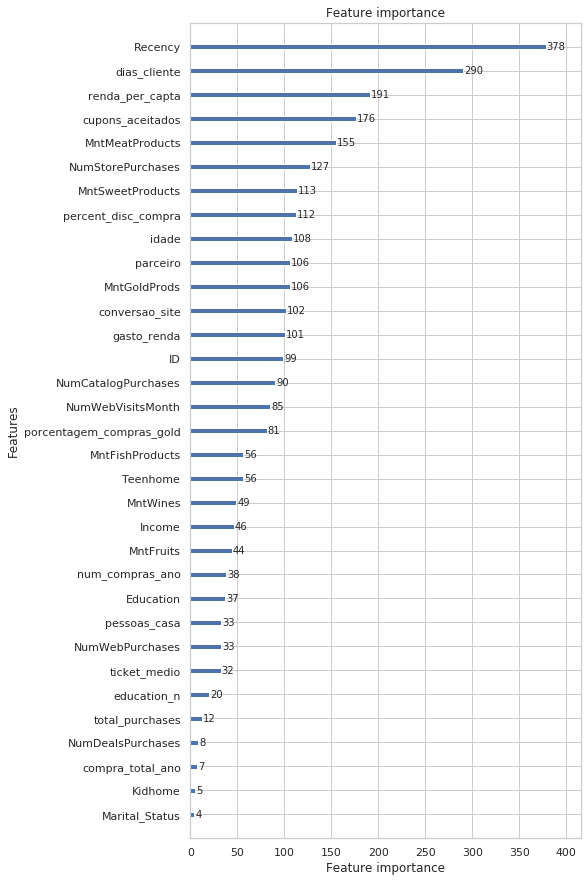

In [24]:
lgb.plot_importance(results[best_i]['model'], figsize = (7,15))

In [25]:
y_pred =  results[best_i]['model'].predict(x_test, num_iteration=results[best_i]['model'].best_iteration)
y_pred_t =  results[best_i]['model'].predict(x_train, num_iteration=results[best_i]['model'].best_iteration)

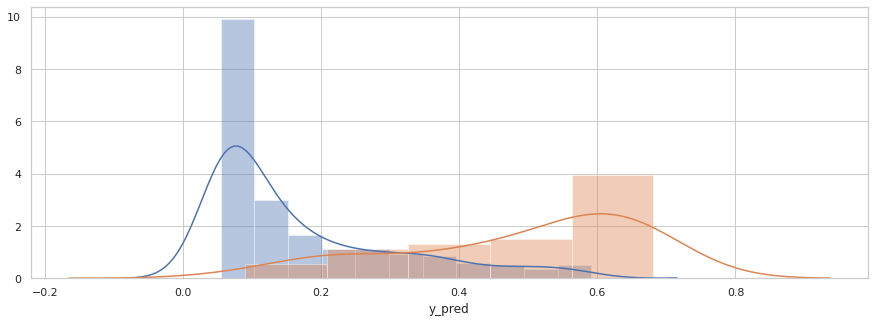

In [26]:
result = pd.DataFrame(y_test).copy()
result.columns = ['y_test']
result['y_pred'] = y_pred

plt.figure(figsize = (15,5))
for i in [0,1]:
    a = result[result['y_test'] == i]
    sns.distplot(a.y_pred)

ROC AUC
Random: 0.500
Model:  0.918


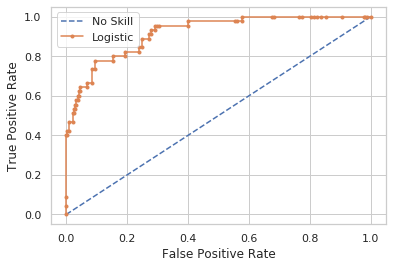

In [27]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

ns_probs = [0 for _ in range(len(result['y_test']))]
ns_auc = roc_auc_score(result['y_test'], ns_probs)
lr_auc = roc_auc_score(result['y_test'], result['y_pred'])
# summarize scores
print('ROC AUC')
print('Random: %.3f' % (ns_auc))
print('Model:  %.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(result['y_test'], ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(result['y_test'], result['y_pred'])
# plot the roc curve for the model
0.559abel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

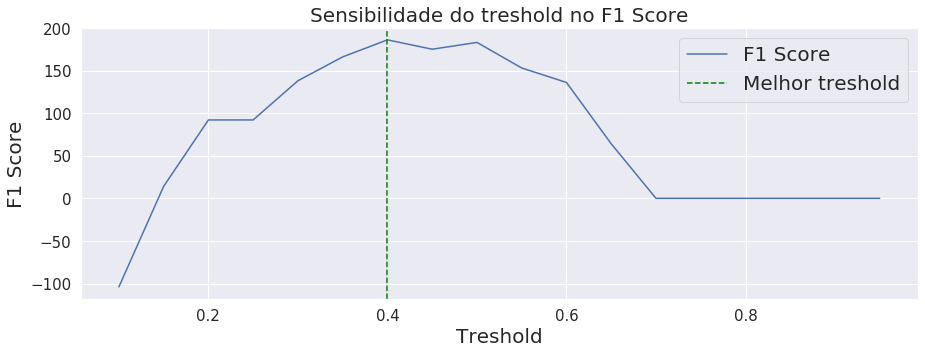

valor máximo de F1: 186.000%


In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
treshold = f1_treshold(result['y_test'], result['y_pred'])

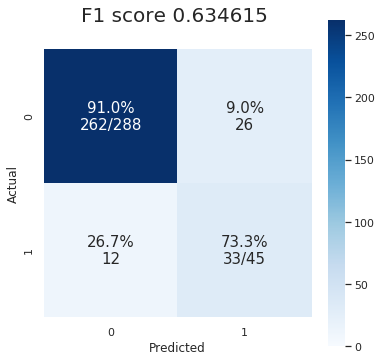

In [29]:
result['bin'] = (result['y_pred'] > treshold).astype(int)

cm_analysis(result['y_test'].values, result['bin'].values, (0,1))

In [32]:
68/(68+49)

0.5811965811965812

In [30]:
prune = 100

importances = dict(zip(df.columns,results[best_i]['model'].feature_importance()))
new_cols = [col for col in importances.keys() if importances[col] > prune]
new_cols

['MntWines',
 'MntFishProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebVisitsMonth',
 'idade',
 'dias_cliente',
 'parceiro',
 'renda_per_capta',
 'gasto_renda',
 'percent_disc_compra',
 'conversao_site',
 'cupons_aceitados']

In [271]:
2*14 + 2*9 + 4*4.5 + 5 + 150

219.0

In [ ]:
X = df[list(set(continous_features).union(set(category_features)))]
y = df[target]

In [ ]:
model = RandomForestRegressor(n_jobs=-2)
model = model.fit(X, y.squeeze())